In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests,lxml

In [3]:
no_pages = 20
#function which will input the page numbers as an argument
def get_data(pageNo): 
    #defining headers which will help in bypassing the detection as a scraper
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    
    #Specify the URL to requests.get and pass the user-agent header as an argument
    r = requests.get('https://www.amazon.eg/-/en/s?i=electronics&rh=n%3A21832868031&fs=true&qid=1651952313&ref=sr_pg_'+str(pageNo), headers=headers)#, proxies=proxies)
    
    #Extract the content from requests.get
    content = r.content
    
    #Scrape the specified page and assign it to soup variable
    soup = BeautifulSoup(content)

    alls = []
    
    #Extracting the data using the parent tag
    for d in soup.findAll('div', attrs={'class':'sg-col-inner'}):
        name = d.find('span', attrs={'class':'a-size-base-plus a-color-base a-text-normal'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-base s-underline-text'})
        price = d.find('span', attrs={'class':'a-price-whole'})

        all1=[]

        if name is not None:
            all1.append(name.text)
        else:
            all1.append("unknown-product")


        if rating is not None:
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [4]:
results = []
#Call the get_data function inside a for loop
#The for loop will iterate over this function starting from 1 till the number of pages+1.
for i in range(1, no_pages+1):
    results.append(get_data(i))

#Since the output will be a nested list, you would first flatten the list and then pass it to the DataFrame.  
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Product_Name','Rating','Customers_Rated', 'Price'])

#save the dataframe as a CSV file.
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [5]:
df = pd.read_csv("amazon_products.csv")
df.head(500)

,Product_Name,Rating,Customers_Rated,Price
0,unknown-product,-1,0,0
1,unknown-product,-1,0,0
2,"Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...",4.2 out of 5 stars,598,"4,299."
3,"Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...",4.2 out of 5 stars,598,"4,299."
4,"Samsung Galaxy A52 Dual SIM - 6.5 inches, 8 GB...",4.1 out of 5 stars,24,"7,399."
...,...,...,...,...
495,"Oppo A55 4GB RAM, 128GB - STARRY BALCK",3.1 out of 5 stars,6,0
496,"Oppo A74 Dual SIM Mobile Phone - 6.43 Inch, 12...",3.6 out of 5 stars,6,"6,190."
497,Xiaomi Redmi Note 10S Dual SIM Amoled Display ...,5.0 out of 5 stars,1,"5,700."
498,"Realme 8 Dual SIM - 6.4 inches, 128GB, 8GB RAM...",4.5 out of 5 stars,15,0


In [6]:
df.dtypes

Product_Name       object
Rating             object
Customers_Rated    object
Price              object
dtype: object

- Since you know the ratings are out of 5, you can keep only the rating and remove the extra part from it.
- From the customers_rated column, remove the comma.
- From the price column, remove the comma, and split it by dot.
- Finally, convert all the three columns into float.

In [7]:
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])
df['Rating'] = pd.to_numeric(df['Rating'])

In [8]:
df["Price"] = df["Price"].str.replace(',', '')
df['Price'] = df['Price'].apply(lambda x: x.split('.')[0])
df['Price'] = df['Price'].astype(int)

In [9]:
df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '')
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')

In [10]:
#convert the 0 and -1 values to NaN
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)

In [11]:
df.isnull().sum()

Product_Name         0
Rating              36
Customers_Rated     54
Price              144
dtype: int64

In [12]:
#drop nulls
df = df.dropna()

In [13]:
#reset the index
df.reset_index(drop=True, inplace=True)

In [14]:
df.head(500)

,Product_Name,Rating,Customers_Rated,Price
0,"Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...",4.2,598.0,4299.0
1,"Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...",4.2,598.0,4299.0
2,"Samsung Galaxy A52 Dual SIM - 6.5 inches, 8 GB...",4.1,24.0,7399.0
3,"Samsung Galaxy A52 Dual SIM - 6.5 inches, 8 GB...",4.4,12.0,7444.0
4,Reno 6 Black Dual Sim 8GB RAM 128GB 4G LTE -,4.6,22.0,8399.0
...,...,...,...,...
355,Xiaomi Redmi Note 10S Dual SIM Amoled Display ...,5.0,1.0,5700.0
356,OPPO Reno 6 5G - 6.4-inch 128GB/8GB Dual SIM 5...,5.0,3.0,10114.0
357,Xiaomi Mi VXN4304GL Fast Charging Power Bank 2...,4.3,459.0,421.0
358,"Apple iPhone 13 Pro Max with FaceTime - 256GB,...",4.5,13.0,28840.0


In [15]:
#dropping the outliers
df = df[df["Customers_Rated"] < 2000]
df = df[df["Price"] < 15000]

<AxesSubplot:xlabel='Price', ylabel='Customers_Rated'>

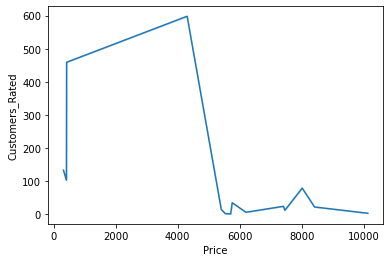

In [16]:
sns.lineplot(data=df, x="Price", y="Customers_Rated")

<AxesSubplot:xlabel='Rating', ylabel='Customers_Rated'>

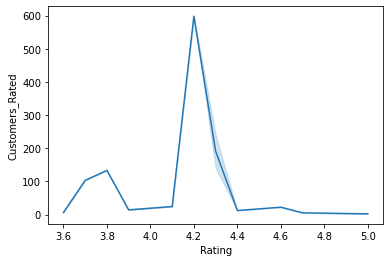

In [17]:
sns.lineplot(data=df, x="Rating", y="Customers_Rated")

In [19]:
df.head()

,Product_Name,Rating,Customers_Rated,Price
0,"Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...",4.2,598.0,4299.0
1,"Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...",4.2,598.0,4299.0
2,"Samsung Galaxy A52 Dual SIM - 6.5 inches, 8 GB...",4.1,24.0,7399.0
3,"Samsung Galaxy A52 Dual SIM - 6.5 inches, 8 GB...",4.4,12.0,7444.0
4,Reno 6 Black Dual Sim 8GB RAM 128GB 4G LTE -,4.6,22.0,8399.0


In [20]:
df['Price']=pd.cut(df.Price,
                  bins=[4000,6000,8000],labels=['4000-6000','6000-8000'])

In [21]:
df.dropna

<bound method DataFrame.dropna of                                           Product_Name  Rating  \
0    Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...     4.2   
1    Samsung Galaxy A12 Dual SIM Mobile - 6.5 Inch,...     4.2   
2    Samsung Galaxy A52 Dual SIM - 6.5 inches, 8 GB...     4.1   
3    Samsung Galaxy A52 Dual SIM - 6.5 inches, 8 GB...     4.4   
4         Reno 6 Black Dual Sim 8GB RAM 128GB 4G LTE -     4.6   
..                                                 ...     ...   
354  Oppo A74 Dual SIM Mobile Phone - 6.43 Inch, 12...     3.6   
355  Xiaomi Redmi Note 10S Dual SIM Amoled Display ...     5.0   
356  OPPO Reno 6 5G - 6.4-inch 128GB/8GB Dual SIM 5...     5.0   
357  Xiaomi Mi VXN4304GL Fast Charging Power Bank 2...     4.3   
359  TCL MTRO200BT Wireless On-Ear Headphones Super...     3.8   

     Customers_Rated      Price  
0              598.0  4000-6000  
1              598.0  4000-6000  
2               24.0  6000-8000  
3               12.0  6000-8000  
4  

In [22]:
df.dropna(inplace=True)

In [23]:
df['Rating']=pd.cut(df.Rating,
                  bins=[3,4,5],labels=['3-4','4-5'])

# Step 1: Collect observed frequency data

In [41]:
## Getting our new rows and cols
rows=df['Rating'].unique()
cols=df['Price'].unique()

In [42]:
## Counting the values
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        l.append(len(df[(df['Rating']==i) & (df['Price']==j)]))
    matrix.append(l)
matrix

[[108, 36], [18, 18]]

In [43]:
pd.DataFrame(matrix,index=rows,columns=cols)

,4000-6000,6000-8000
4-5,108,36
3-4,18,18


In [44]:
# Creating a dataframe
observedValues=pd.DataFrame(matrix,index=rows,columns=cols)

In [45]:
## We will use sum to sum the columns
observedValues.sum()

4000-6000    126
6000-8000     54
dtype: int64

In [46]:
observedValues.loc['Total']=observedValues.sum()

In [47]:
## Then sum with axis =1 to sum rows
observedValues['Total']=observedValues.sum(axis=1)

In [48]:
df.shape

(180, 4)

In [49]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        v=(observedValues.loc[i,'Total']*observedValues.loc['Total',j])/observedValues.loc['Total','Total']
        l.append(v)
    matrix.append(l)
matrix

[[100.8, 43.2], [25.2, 10.8]]

In [50]:
expectedF=pd.DataFrame(matrix,index=rows,columns=cols)
expectedF

,4000-6000,6000-8000
4-5,100.8,43.2
3-4,25.2,10.8


In [51]:
observedValues.drop('Total',axis=1,inplace=True)
observedValues.drop('Total',axis=0,inplace=True)

In [52]:
observedValues

,4000-6000,6000-8000
4-5,108,36
3-4,18,18


In [53]:
freeDom=(df.shape[0]-1)*(df.shape[1]-1)
freeDom

537

In [54]:
observedValues.values.flatten()

array([108,  36,  18,  18], dtype=int64)

In [55]:
from itertools import zip_longest
def UniqueResults(dataframe):
    tmp = [dataframe[col].unique() for col in dataframe]
    return pd.DataFrame(zip_longest(*tmp), columns=dataframe.columns)

out = UniqueResults(df)

In [56]:
Table=pd.DataFrame(observedValues.values.flatten(),columns=['O'])
Table

,O
0,108
1,36
2,18
3,18


In [57]:
## Let's add Expected value
Table['E']=expectedF.values.flatten()
Table

,O,E
0,108,100.8
1,36,43.2
2,18,25.2
3,18,10.8


In [58]:
## Let's calculate O-E
Table['O-E']=Table['O']-Table['E']
Table

,O,E,O-E
0,108,100.8,7.2
1,36,43.2,-7.2
2,18,25.2,-7.2
3,18,10.8,7.2


In [59]:
## Let's calculate (O-E)^2
Table['(O-E)^2']=Table['O-E']**2
Table

,O,E,O-E,(O-E)^2
0,108,100.8,7.2,51.84
1,36,43.2,-7.2,51.84
2,18,25.2,-7.2,51.84
3,18,10.8,7.2,51.84


In [60]:
## Let's calculate ((O-E)^2)\E
Table['((O-E)^2)\E']=Table['(O-E)^2']/Table['E']
Table

,O,E,O-E,(O-E)^2,((O-E)^2)\E
0,108,100.8,7.2,51.84,0.514286
1,36,43.2,-7.2,51.84,1.200000
2,18,25.2,-7.2,51.84,2.057143
3,18,10.8,7.2,51.84,4.800000


In [61]:
Score=Table['((O-E)^2)\E'].sum()
Score

8.571428571428571

<img src='https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg'>

We fail to Reject the Null Hypothesis